<a href="https://colab.research.google.com/github/outinletter/DataAnalysis/blob/main/K_ICT_%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%84%BC%ED%84%B0%2C_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EA%B0%95%EC%9D%98%2C_9%EC%9E%A5_%EC%98%A8%EB%9D%BC%EC%9D%B8_%EA%B4%91%EA%B3%A0_%ED%81%B4%EB%A6%AD_%EC%98%88%EC%B8%A1_v1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 09-5 - 의사결정트리 기반 광고 클릭 예측 모델 학습 데이터 준비
> https://www.youtube.com/watch?v=uwdkMXoFOWs&list=PLwvr-xPygMX9TaQFW3C1UGEuD0zJF7pCk&index=53&ab_channel=K-ICT%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%84%BC%ED%84%B0

> https://www.kaggle.com/c/avazu-ctr-prediction/download/train.gz
# https://www.kaggle.com/c/avazu-ctr-prediction/data?select=train.gz#:~:text=drive_zip_outline-,train,-.gz

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import os
print(os.getcwd())

/content


In [ ]:
import os
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
# kaggle.json 파일 열어서 user명과 key값 확인
os.environ['KAGGLE_USERNAME'] = 'bsjeon'
os.environ['KAGGLE_KEY'] = '2461866e6d4f47fcc2f786f3602aff81'

In [ ]:
# !kaggle datasets download c/avazu-ctr-prediction/data?select=train.gz
# !kaggle datasets download https://www.kaggle.com/c/avazu-ctr-prediction/data?select=train.gz#:~:text=drive_zip_outline-,train,-.gz

In [ ]:
# cd /Users/imac/Downloads

In [ ]:
train_df = pd.read_csv('train.gz', nrows=100000)

In [ ]:
train_df.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.000009e+18,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,ddd2926e,44956a24,1,2,15706,320,50,1722,0,35,-1,79
1,1.000017e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,96809ac8,711ee120,1,0,15704,320,50,1722,0,35,100084,79
2,1.000037e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,b3cf8def,8a4875bd,1,0,15704,320,50,1722,0,35,100084,79
3,1.000064e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,e8275b8f,6332421a,1,0,15706,320,50,1722,0,35,100084,79
4,1.000068e+19,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,07d7df22,a99f214a,9644d0bf,779d90c2,1,0,18993,320,50,2161,0,35,-1,157


In [ ]:
train_df.shape

(100000, 24)

In [ ]:
train_df.columns

Index(['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21'],
      dtype='object')

In [ ]:
unused_columns, label_column = ['id', 'hour', 'device_id', 'device_ip'], 'click'

In [ ]:
train_df = train_df.drop(unused_columns, axis=1)

In [ ]:
train_df.shape

(100000, 20)

In [ ]:
train_df.columns

Index(['click', 'C1', 'banner_pos', 'site_id', 'site_domain', 'site_category',
       'app_id', 'app_domain', 'app_category', 'device_model', 'device_type',
       'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20',
       'C21'],
      dtype='object')

In [ ]:
X_dict_train = list(train_df.drop(label_column, axis=1).T.to_dict().values())
# 딕셔너리 형태로 변환하는 이유는 DictVectorizer 사용하여 원핫인코딩 하기 위함

In [ ]:
X_dict_train[0]

{'C1': 1005,
 'C14': 15706,
 'C15': 320,
 'C16': 50,
 'C17': 1722,
 'C18': 0,
 'C19': 35,
 'C20': -1,
 'C21': 79,
 'app_category': '07d7df22',
 'app_domain': '7801e8d9',
 'app_id': 'ecad2386',
 'banner_pos': 0,
 'device_conn_type': 2,
 'device_model': '44956a24',
 'device_type': 1,
 'site_category': '28905ebd',
 'site_domain': 'f3845767',
 'site_id': '1fbe01fe'}

In [ ]:
y_train = train_df[label_column]

In [ ]:
test_df = pd.read_csv('train.gz', header=0, skiprows=(1, 100000), nrows=100000)

In [ ]:
test_df = test_df.drop(unused_columns, axis=1)

In [ ]:
X_dict_test = list(test_df.drop(label_column, axis=1).T.to_dict().values())

In [ ]:
y_test = test_df[label_column]

## 범주형 데이터의 변환 필요, 원핫인코딩

In [ ]:
from sklearn.feature_extraction import DictVectorizer

In [ ]:
vectorizer = DictVectorizer(sparse=True)
# sparse = True : 희소 행렬(0이 아닌 값만 위치)
# 그리드 서치 사용시 메모리 오류 발생을 방지하기 위해 반드시 sparse 매트릭스 사용

In [ ]:
vectorizer

DictVectorizer(dtype=<class 'numpy.float64'>, separator='=', sort=True,
               sparse=True)

In [ ]:
X_train = vectorizer.fit_transform(X_dict_train)

In [ ]:
X_train.shape

(100000, 4952)

In [ ]:
pd.DataFrame(X_train).head()

,0
0,"(0, 0)\t1005.0\n (0, 1)\t15706.0\n (0, 2)\..."
1,"(0, 0)\t1005.0\n (0, 1)\t15704.0\n (0, 2)\..."
2,"(0, 0)\t1005.0\n (0, 1)\t15704.0\n (0, 2)\..."
3,"(0, 0)\t1005.0\n (0, 1)\t15706.0\n (0, 2)\..."
4,"(0, 0)\t1005.0\n (0, 1)\t18993.0\n (0, 2)\..."


In [ ]:
X_train.toarray()[:5]

array([[ 1005., 15706.,   320., ...,     0.,     0.,     0.],
       [ 1005., 15704.,   320., ...,     0.,     0.,     0.],
       [ 1005., 15704.,   320., ...,     0.,     0.,     0.],
       [ 1005., 15706.,   320., ...,     0.,     0.,     0.],
       [ 1005., 18993.,   320., ...,     0.,     0.,     0.]])

In [ ]:
X_test = vectorizer.fit_transform(X_dict_test)

# 09-6 - 의사결정트리 기반 광고 클릭 예측 모델의 학습
> https://www.youtube.com/watch?v=SVQWHz5p00A&list=PLwvr-xPygMX9TaQFW3C1UGEuD0zJF7pCk&index=54&ab_channel=K-ICT%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%84%BC%ED%84%B0

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
parameters = {'max_depth' : [3, 15, None]}
decision_tree = DecisionTreeClassifier(criterion='gini', min_samples_split=30)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_search = GridSearchCV(decision_tree, parameters, n_jobs = -1, cv=3, scoring='roc_auc')
# roc_auc : 분류평가지표

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=30,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [3, 15, None]}, pre_dispatch='2*n_jobs',


In [ ]:
grid_search.best_params_

{'max_depth': 15}

In [ ]:
decision_tree_best = grid_search.best_estimator_

In [ ]:
from sklearn.tree import export_graphviz

In [ ]:
export_graphviz(decision_tree_best, out_file='ctr_decision_tree.dot', feature_names = vectorizer.feature_names_, 
                class_names=['0', '1'], rounded = True, filled=True, impurity=True)
# dot 파일로 출력, class_names : 클릭 여부 분류

In [ ]:
import pydot
graph = pydot.graph_from_dot_file('ctr_decision_tree.dot')[0]
graph.write_png('ctr_decision_tree.png')

In [ ]:
import os
os.getcwd()

'/content'

# 09-7 혼동행렬(confusion matrix)
> https://www.youtube.com/watch?v=fvyWhQW9oyo&list=PLwvr-xPygMX9TaQFW3C1UGEuD0zJF7pCk&index=55&ab_channel=K-ICT%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%84%BC%ED%84%B0

- 정확도(accuracy) : 전체 샘플ㄹ에서 정확하게 예측한 샘플 수의 비율

    : TP+TN / (TP+TN+FP+FN)

- 정밀도(precision) : 'Positive 클래스로 예측한' 샘플에서 실제 Positive 클래스에 속하는 샘플수의 비율
    
    : TP / (TP+FP)

- 재현율(recall, TPR) : '실제 Positive 클래스에 속한' 샘플에서 Positive 클래스에 속한다고 예측한 샘플 수의 비율
    (참 긍정률 : True Positive rate, 민감도(Sensitivity))
    
    : TP / (TP+FN)

- 위양성률(fallout, FPR) : '실제 Positive 클래스에 속하지 않는' 샘플에서 Positive 클래스에 속하다고 예측한 샘플 수의 비율
    (거짓 긍정률 : False Positive Rate)

    : FP / (FP+TN)

## ROC(Receiver Operating Characteristics)
- 참 긍정률(TPR)과 거짓 부정률(FPR) 사이를 표현하기 위해 사용
- 예측된 확률로부터 여러 클래스로 분류를 수행하는 데 활용

In [ ]:
y_pred = decision_tree_best.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
np.unique(y_pred, return_counts=True)
# 0: unclick

(array([0, 1]), array([96378,  3622]))

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, y_pred)

0.8362

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[81254,  1256],
       [15124,  2366]])

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

In [ ]:
y_pred_proba = decision_tree_best.predict_proba(X_test)[:, 1]
y_pred_proba # 두 번째 클릭 확률값

array([0.20534795, 0.13114754, 0.3030303 , ..., 0.12054795, 0.06002947,
       0.06002947])

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

In [ ]:
auc = roc_auc_score(y_test, y_pred_proba)

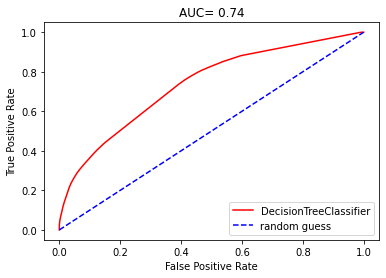

In [ ]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, 'r-', label = 'DecisionTreeClassifier')
plt.plot([0,1], [0,1], 'b--', label = 'random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC={0: .2f}'.format(auc))
plt.legend(loc='lower right');

# 09-8 - 앙상블 기법 활용 광고 클릭 예측 모델 개선
> https://www.youtube.com/watch?v=xwvqTa8AffQ&list=PLwvr-xPygMX9TaQFW3C1UGEuD0zJF7pCk&index=56&ab_channel=K-ICT%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%84%BC%ED%84%B0

# 주요 정리
- Scikit-Learn의 의사결정 트리 분류기는 CART 알고리즘의 분류에 대한 비용함수에서 지니 불순도를 기본적으로 사용
- Scikit-Learn의 트리 기반 알고리즘은 수치형 특징을 입력 값으로 하기 때문에 범주형 특징은 원핫인코딩을 통해 이진 특징으로 변환
- 혼동행렬은 실제 관측값을 얼마나 정확하게 예측했는지를 보여주는 행렬로 분류 모델의 성능 측정을 위한 평가지표 계산의 기반이 됨
- 분류 모델의 평가지표로 정확도, 정밀도, 재현율, F1 점수, 특이성 , ROC 커브의 AUC(곡선하 면적) 등을 사용
- 랜덤 포레스트는 특징 기반 배깅 방법을 적용한 의사결정 트리의 앙상블로 의사결정 트리모델의 고분산을 줄이며, 단일 트리보다 훨씬 더 좋은 성능을 제공
- Scikit-Learn의 랜덤 포레스트 특징 중요도는 개별 트리의 특징 중요도를 모두 합한 후 트리의 수로 나눈 것으로, 중요도의 합이 1이 되도록 결과값을 정규화함

## Decision Tree의 가장 큰 문제점
- 훈련데이터에 대한 고분산성

## 앙상블 학습과 배깅
- 부트스트랩 : Bootstrap, 중복을 허용하는 리샘플링
- 배깅(Bagging) : 'B'ootstrap 'agg'regating의 약자
- 훈련 데이터에서 부트스트래핑한 샘플에 대해 모든 변수를 선택해 다수의 의사경정 트리를 구성
- 개별 예측기의 편향은 높지만, 수집함수를 통과한 후 앙상블의 결과는 원본 데이터 셋으로 하나의 예측기를 훈련시킬 때보다 편향은 비슷하지만 대체로 분산은 줄어듦

## 랜덤 포레스트 (효과가 좋은 결과를 많이 내고, 최근 많이 사용함)
- 랜덤 포레스트는 특징 기반 배깅 방법을 적용한 의사결정 트리의 앙상블
- 트리 배깅은 의사결정 트리 모델의 단점 중 하나인 고분산을 줄여주며 이를 통해 단일 트리보다 훨씬 더 좋은 성능을 제공
- 개별 트리간의 상관관계 문제를 피하기 위해 부트스트래핑 과정에서 훈련 데이터로부터 전체 p개의 변수 중 무작위 m개의 변수만 선택
- 랜덤 포레스트의 무작위성 주입은 트리를 보다 다양하게 만들고, 편향을 손해 보는 대신 분산을 낮추어 훌륭한 모델을 만듦

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators = 500, n_jobs=-1) 
# n_jobs : 전체프로세스를 사용
random_forest.fit(iris.data, iris.target)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:
for feature, importance in zip(iris.feature_names, random_forest.feature_importances_):
    print('{} : {}'.format(feature, importance))
# 배제된 것 없이 모두 중요도를 확인할 수 있음

sepal length (cm) : 0.10029732019326702
sepal width (cm) : 0.024145805555928063
petal length (cm) : 0.4540182122769044
petal width (cm) : 0.4215386619739004


In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, criterion='gini', 
                                       min_samples_split=30, n_jobs=-1)
# gini 불순도 계수, parameter(max depth)
grid_search = GridSearchCV(random_forest, parameters, n_jobs=-1, cv=3, scoring='roc_auc')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=30,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False,
                                              random

In [ ]:
RandomForestClassifier()

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## 랜덤 포레스트의 성능 개선을 위한 주요 파라미터
- max_feature : 최적의 분할 지점을 찾기 위해 검토할 특징의 개수, 일반적으로 n차원의 데이터 세트의 root(n)의 반올림 값을 설정
- n_estimator : 트리의 개수가 많을 수록 성능이 더 좋지만 계산 시간이 많이 걸림. 일반적으로 100, 200, 500을 설정
- min_sample_split : 노드에서 추가 분할을 위해 필요한 샘플의 최소 개수. 숫자가 너무 작으면 오버피팅, 너무 크면 언더피팅이 일어날 수 있음. 일반적으로 10, 30, 50으로 시작

In [ ]:
X_test

<100000x4952 sparse matrix of type '<class 'numpy.float64'>'
	with 1900000 stored elements in Compressed Sparse Row format>

In [ ]:
grid_search.best_params_ # parameters = {'max_depth' : [3, 15, None]}

{'max_depth': None}

In [ ]:
random_forest_best = grid_search.best_estimator_ # best_estimator로 객체를 만듦

In [ ]:
y_pred = random_forest_best.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
accuracy_score(y_test, y_pred)

0.85202

In [ ]:
y_pred_proba = random_forest_best.predict_proba(X_test)[:, 1]
# 확률 기반 예측 (클릭할 확률)

In [ ]:
y_pred_proba, len(y_pred_proba), X_test.shape

(array([0.20862823, 0.12989251, 0.30397424, ..., 0.11778577, 0.19929287,
        0.05027882]), 100000, (100000, 4952))

- 재현율(recall, TPR) : '실제 Positive 클래스에 속한' 샘플에서 Positive 클래스에 속한다고 예측한 샘플 수의 비율 (참 긍정률 : True Positive rate, 민감도(Sensitivity))

    : TP / (TP+FN)

- 위양성률(fallout, FPR) : '실제 Positive 클래스에 속하지 않는' 샘플에서 Positive 클래스에 속하다고 예측한 샘플 수의 비율 (거짓 긍정률 : False Positive Rate)

    : FP / (FP+TN)

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
# _ : 임계값(thresholds)
# roc_auc : 분류평가지표

In [ ]:
auc = roc_auc_score(y_test, y_pred_proba)

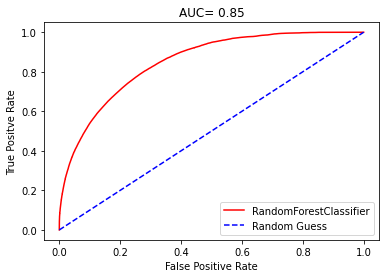

In [ ]:
plt.plot(fpr, tpr, 'r-', label = 'RandomForestClassifier')
plt.plot([0,1], [0, 1], 'b--', label = 'Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positve Rate')
plt.title('AUC={0: .2f}'.format(auc))
plt.legend(loc='lower right');

# 10-1 - 로지스틱 회귀 개념
> https://www.youtube.com/watch?v=853BBAG3OVM&list=PLwvr-xPygMX9TaQFW3C1UGEuD0zJF7pCk&index=58&ab_channel=K-ICT%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%84%BC%ED%84%B0

## 로지스틱 회귀의 개요
- 베르누이 분포 : 긍정 확률(양성확률) P와 부정 확률(음성확률) 1-P를 갖는 랜덤 변수의 확률 분포(자연계의 일반적인 정규분포와 대칭이 되는 구조의 분포 (예: 동전 던지기 등)
- 베르누이 분포를 따르는 반응 변수의 확률 범위는 [0,1]
- 선형 회귀는 특징 값의 일정한 변화로 반응 변수에도 일정한 변화가 일어난다는 가정을 하므로, 반응 변수가 확률을 나타낼 경우 가정이 유효하지 않음
- 일반화 선형 모델은 연결 함수를 사용해 특징의 선형 조합을 반응 변수와 연결 짓는 방법을 통해 선형 회귀의 가정을 없앰
- 특징의 선형 조합을 정규 분포를 따르지 않는 반응 변수와 연계하려면 연결함수가 필요

## 로지스틱 회귀와 분류
- 로지스틱 회귀의 반응 변수의 값 = 긍정(양성) 클래스의 확률
- 반응 변수의 값 >= 임계치(0~1값 중 0.5) : 긍정(양성) 클래스를 예측
- 반응 변수는 '로지스틱 함수'를 사용해 특징의 선형 조합 함수로 모델링 됨(로지스틱 함수 : 테스트 인스턴스를 사용해서 값이 0~1 사이의 값이 나오게 계산해 주는 것)
- 로지스틱 회귀는 이진 분류(예: 스팸 vs 햄, 양성종양 vs 악성종양, 흡연 vs 비흡연)

In [ ]:
def sigmoid(z) :
    return 1.0 / (1+np.exp(-z))
# exp : exponent 함수

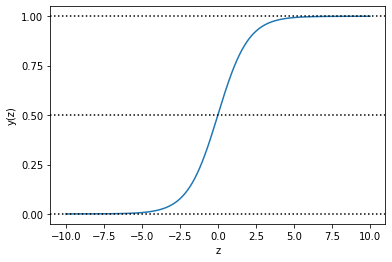

In [ ]:
z = np.linspace(-10, 10, 1000)
y = sigmoid(z)
plt.plot(z, y)
plt.axhline(y=0, linestyle = ':', color='black')
plt.axhline(y=0.5, linestyle = ':', color='black')
plt.axhline(y=1, linestyle = ':', color='black')
plt.yticks([0.0, 0.25, 0.5, 0.75, 1.0])
plt.xlabel('z')
plt.ylabel('y(z)');

# 10-4 - 로지스틱 회귀 기반 광고 클릭 예측 모델 학습
## 그리드 서치를 이용한 로지스틱 회귀 모델 학습
### LogisticRegression는 이진 분류기, 대규모 데이터를 다룰 때 매우 유용

> https://www.youtube.com/watch?v=GKTsHh7uj98&list=PLwvr-xPygMX9TaQFW3C1UGEuD0zJF7pCk&index=61&ab_channel=K-ICT%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%84%BC%ED%84%B0

In [ ]:
from sklearn.linear_model.logistic import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)
# 버전 업을 예고하는 Future Warning

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.linear_model.logistic module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

- LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, l1_ratio=None, max_iter=100, multi_class='auto', n_jobs=None, penalty='l2', random_state=None, solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

- C : 오버피팅을 방지, 값이 커지면 규제가 느슨해지고, 0에 가까워지면 규제가 강해지는 경향
- l1 규제 : 0이 됨
- l2 가중치 페널티 : 0에 가깝게

In [ ]:
from sklearn.model_selection import GridSearchCV

# parameters = {'C': [0.001, 0.01, 0.1, 1, 10], 'penalty' : ['l1', '12']}
parameters = {'C': [0.001, 0.01, 0.1, 1, 10],   'penalty' : ['l1', 'l2']}
grid_search = GridSearchCV(clf, parameters, n_jobs=-1, cv=3, scoring='roc_auc')
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [ ]:
grid_search.best_params_ # 최적의 파라미터 출력

{'C': 1, 'penalty': 'l2'}

In [ ]:
clf_best = grid_search.best_estimator_

In [ ]:
y_pred = clf_best.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
np.unique(y_pred, return_counts=True)
# 음성(unclick) 9981

(array([0, 1]), array([99680,   320]))

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)
# 실측값(y_test), 예측값(y_pred) 순으로 작성

0.82398

In [ ]:
 from sklearn.metrics import confusion_matrix
 confusion_matrix(y_test, y_pred)

array([[82294,   216],
       [17386,   104]])

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
y_pred_proba = clf_best.predict_proba(X_test)[:, 1]
# 로지스틱 회귀는 확률 기반이므로 predic가 아니라 predict probability(predict_proba) 사용
# X_test 확률 양성값은 두 번째 열에 저장
y_pred_proba

array([0.15490176, 0.15489559, 0.15488173, ..., 0.18262125, 0.18447341,
       0.09986801])

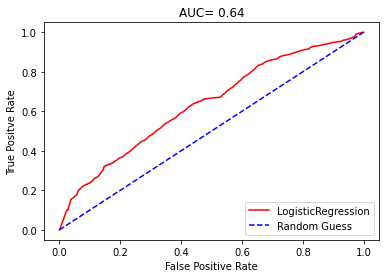

In [ ]:
# roc_auc_score 함수를 이용해 곡선의 밑면적과 관련돼 있는 정보를 바로 얻어서 사용할 수 있음
# 분류기로서의 성능을 auc지표를 통해 확인

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, 'r-', label = 'LogisticRegression')
plt.plot([0,1], [0, 1], 'b--', label = 'Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positve Rate')
plt.title('AUC={0: .2f}'.format(auc))
plt.legend(loc='lower right');

# 11-1 K-최근접 이웃(KNN) 알고리즘 개념
> https://www.youtube.com/watch?v=8gd0QeQ9ilQ&list=PLwvr-xPygMX9TaQFW3C1UGEuD0zJF7pCk&index=64&ab_channel=K-ICT%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%84%BC%ED%84%B0

- 분류나 회귀에 사용할 수 있는 알고리즘으로 단수해 보이지만 강력하고 유용한 기법
- 비매개변수 머신러닝 모델
- 훈련 단계에서 학습을 하지 않기 때문에 '게이른 학습'이라 부름
- 테스트/검증 단계에서 테스트 관측값과 가장 근접한 훈련 관측값을 비교
- 거리에만 의존하므로 차원의 저주에 따라 예측에 필요한 특징의 개수가 늘어나면 성능이 크게 저하됨
- k개의 가장 가까운 훈련 인스턴스를 골라 가장 많은 레이블을 분류로 선택
- 특징의 표준화된 크기 조절(스케일링)이 필요
- k-최근접 이웃 분류기의 성능측정은 혼동행렬을 이용해 정확도, AUC와 같은 다양한 평가지표를 활용할 수 있다.
- 그리드 서치를 이용해 n_neightbors와 같은 k-최근접 이웃 하이퍼파라미터의 최적 값을 찾아낼 수 있다.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

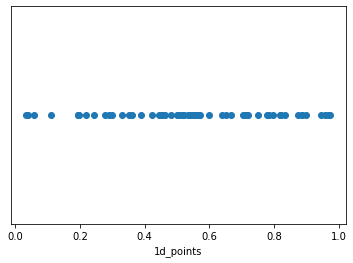

In [ ]:
df_1d = pd.DataFrame(data = np.random.rand(60,1), columns=['1d_points'])
df_1d['height'] = 1
plt.scatter(df_1d['1d_points'], df_1d['height'])
plt.yticks([])
plt.xlabel(df_1d.columns[0]);

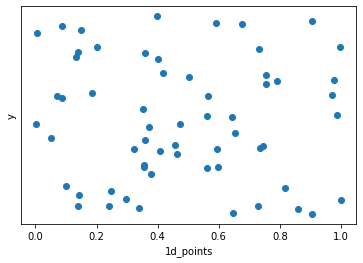

In [ ]:
df_2d = pd.DataFrame(data = np.random.rand(60,2), columns=['x', 'y'])
plt.scatter(df_2d['x'], df_2d['y'])
plt.yticks([])
plt.xlabel(df_1d.columns[0])
plt.ylabel(df_2d.columns[1]);

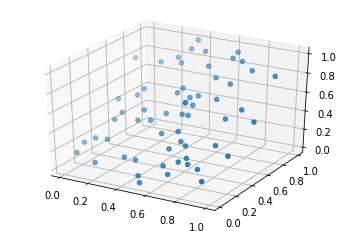

In [ ]:
# 차원이 증가하여 점과 점 사이가 멀어지면 분류기 작동이 어려워짐

df_3d = pd.DataFrame(data = np.random.rand(60,3), columns=['x', 'y', 'z'])

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_3d['x'], df_3d['y'], df_3d['y']);

# 11-2 - 암 진단 분류 모델 데이터 준비

> https://www.youtube.com/watch?v=t86vs1s5jCY&list=PLwvr-xPygMX9TaQFW3C1UGEuD0zJF7pCk&index=65&ab_channel=K-ICT%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%84%BC%ED%84%B0

> https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data



In [ ]:
breast_cancer = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header=None)
breast_cancer.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
breast_cancer.columns = ['id_number', 'clum_thickness', 'unif_cell_size', 'unif_cell_shape','marg_adhesion', 'single_epith_cell_size', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class' ]
breast_cancer.head()

,id_number,clum_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id_number               699 non-null    int64 
 1   clum_thickness          699 non-null    int64 
 2   unif_cell_size          699 non-null    int64 
 3   unif_cell_shape         699 non-null    int64 
 4   marg_adhesion           699 non-null    int64 
 5   single_epith_cell_size  699 non-null    int64 
 6   bare_nuclei             699 non-null    object
 7   bland_chromatin         699 non-null    int64 
 8   normal_nucleoli         699 non-null    int64 
 9   mitoses                 699 non-null    int64 
 10  class                   699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [ ]:
breast_cancer.isnull().values.sum()

0

In [ ]:
breast_cancer['bare_nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [ ]:
breast_cancer['bare_nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: bare_nuclei, dtype: int64

In [ ]:
breast_cancer['bare_nuclei'] = breast_cancer['bare_nuclei'].replace('?', np.NAN)
breast_cancer['bare_nuclei'] = breast_cancer['bare_nuclei'].fillna(breast_cancer['bare_nuclei'].value_counts().index[0])

In [ ]:
breast_cancer['class'].unique()

array([2, 4])

In [ ]:
breast_cancer['cancer_ind'] = 0
breast_cancer.loc[breast_cancer['class']==4, 'cancer_ind'] = 1
# 마스킹 : breast_cancer['class']==4
# 인텍싱 : 'cancer_ind'

In [ ]:
X = breast_cancer.drop(['id_number', 'class', 'cancer_ind'], axis=1)
y = breast_cancer.cancer_ind

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [ ]:
X_train

,clum_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
357,8,10,10,7,10,10,7,3,8
648,5,10,10,10,10,2,10,10,10
291,1,1,1,1,2,1,3,1,1
420,3,2,2,3,2,3,3,1,1
177,5,10,10,3,8,1,5,10,3
...,...,...,...,...,...,...,...,...,...
71,6,10,2,8,10,2,7,8,10
106,10,10,10,8,2,10,4,1,1
270,8,4,7,1,3,10,3,9,2
435,10,8,10,1,3,10,5,1,1


In [ ]:
pd.DataFrame(y_test).head()

,cancer_ind
158,0
499,0
396,0
155,1
321,0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# 스케일링 : (x-평균) / 표준편차

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# train : fit.transform
# test   : transform (이유?)

In [ ]:
X_train_scaled

array([[ 1.23203096,  2.25737003,  2.24548782, ...,  1.3873881 ,
         0.0493974 ,  3.93974808],
       [ 0.16698121,  2.25737003,  2.24548782, ...,  2.57692542,
         2.36566183,  5.16333449],
       [-1.25308511, -0.71708671, -0.76927481, ..., -0.19866165,
        -0.61239244, -0.34280437],
       ...,
       [ 1.23203096,  0.27439887,  1.24056694, ..., -0.19866165,
         2.03476692,  0.26898883],
       [ 1.94206413,  1.59637965,  2.24548782, ...,  0.59436323,
        -0.61239244, -0.34280437],
       [-0.18803537, -0.71708671, -0.43430118, ..., -0.19866165,
        -0.61239244, -0.34280437]])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

In [ ]:
y_pred = knn.predict(X_test_scaled)

In [ ]:
accuracy_score(y_test, y_pred)

0.9761904761904762

In [ ]:
confusion_matrix(y_test, y_pred)

array([[141,   2],
       [  3,  64]])

In [ ]:
roc_auc_score(y_test, y_pred)

0.9706189333055005

### 실습 영상에서는 scaling 작업을 split 전에 실시
1. from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()

2. X_scaled_df = scaler.fit_transform(X_df)
3. from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [ ]:
X_df = breast_cancer.drop(['id_number', 'class', 'cancer_ind'], axis=1)
y = breast_cancer.cancer_ind

In [ ]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()

In [ ]:
X_scaled_df = scaler.fit_transform(X_df)

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size = 0.3, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.9761904761904762

In [ ]:
confusion_matrix(y_test, y_pred)

array([[141,   2],
       [  3,  64]])

In [ ]:
roc_auc_score(y_test, y_pred)

0.9706189333055005

## 그리드 서치를 이용한 하이퍼파라미터의 최적 값 선택

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# knn = KNeighborsClassifier(n_neighbors = 3)
grid_search = GridSearchCV(knn, {'n_neighbors': [1,2,3,4,5]}, n_jobs=-1, cv=7, scoring='roc_auc')

In [ ]:
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=7, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=3, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [ ]:
grid_search.best_params_

{'n_neighbors': 5}

In [ ]:
# knn = KNeighborsClassifier(n_neighbors = 3)
knn_best = grid_search.best_estimator_

In [ ]:
y_pred = knn_best.predict(X_test_scaled)

In [ ]:
accuracy_score(y_test, y_pred)
# 0.9761904761904762 

0.9666666666666667

In [ ]:
confusion_matrix(y_test, y_pred)

array([[141,   2],
       [  5,  62]])

In [ ]:
roc_auc_score(y_test, y_pred)

0.9556935601711722